<a href="https://colab.research.google.com/github/Klussendorf/AnalyticalReportExample/blob/master/%5BMA5751%5DW3_Python2_bootstrap_(updated_on_Nov_3%2C_2020).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The portfolio example in Python

In this code, we learn how to generate bootstrap samples for the portfolio example. 



Recall that $$\alpha=\frac{\sigma_y^2-\sigma_{xy}}{\sigma_x^2+\sigma_y^2-2\sigma_{xy}}$$ is the optimal fraction of asset $X$.

Suppose $\sigma_x^2=Var(X)=1$, $\sigma_y^2=Var(Y)=1.25$, and $\sigma_{xy}=Cov(X,Y)=0.5$.



##1. Generating one sample of data



At 3':37" of the first video of Lesson 3.3, Rob shows four panels of scatter plots of 100 simulated returns of $X$ and $Y$. In his simulations, the resulting estimates of $\alpha$ were 0.576, 0.532, 0.657, and 0.651. In reality, we would be able to observe only one of the four panels. But since this is a simulation experiment, he can keep produing these scatter plots/estimates of $\alpha$.

Let's replicate his simulations in Python. The following code simulates one sample of 100 pairs of returns for investments $X$ and $Y$.
Without loss of generality, we let the everage returns of the two assets are zero: $\mu_x=E(X)=0$ and $\mu_y=E(Y)=0$.


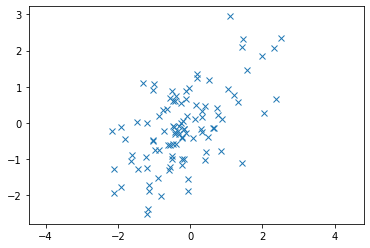

In [1]:
import numpy as np
import matplotlib.pyplot as plt

mu = [0,0]
sigma = [[1,0.5],[0.5,1.12]] 
n = 100

x,y = np.random.multivariate_normal(mu,sigma,n).T

plt.plot(x,y,'x'); plt.axis('equal'); plt.show()



Now let's define the function for $\hat{\alpha}$. 
Recall that $$\hat{\alpha}=\frac{\hat{\sigma}_y^2-\hat{\sigma}_{xy}}{\hat{\sigma}_x^2+\hat{\sigma}_y^2-2\hat{\sigma}_{xy}}$$ is the estimated optimal fraction of asset $X$ based on data, which can be calculated as follows:



In [ ]:
def alpha_fun(r):
  return (r[1,1] - r[0,1]) / (r[0,0] + r[1,1] - 2*r[0,1])

r = np.cov(x, y)
alpha_fun(r)



0.6921529863248377

Note that the true $\alpha$ can be calculated by applying the ```alpha_fun```
 function to ```sigma```.

*   Note that ```alpha_fun(sigma)```
 will create an error code. This is because the argument of ```alpha_fun```
  has to be a numerical object, but it's current form is a **list**. We can make it work by changing the type of ```sigma``` as follows:




In [ ]:
alpha_true = alpha_fun(np.matrix(sigma))
print(alpha_true)

0.5535714285714286



##2. Generating simulated data (infeasible in practice)

In the same video, at 4':39", Rob presented two histograms. Let's first generate the one on the left, a histogram of estimates of $\alpha$ obtained by generating 1,000 simulated data sets from the true population. Note that we cannot obtain this histogram in reality; we can only do this since we are running a simulation study, assuming that we know how the data are generated.


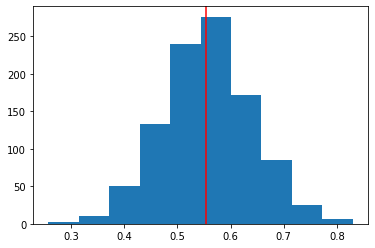

In [ ]:
N = 1000  # the number of replications in simulation

avals = []
for ii in range(N):
  x,y = np.random.multivariate_normal(mu,sigma,n).T
  a = alpha_fun(np.cov(x,y))
  avals.append(a)

plt.hist(avals)
plt.axvline(alpha_true, color='r')
plt.show()

##3. Generating bootstrapped samples based on one sample data (feasible in practice)

In the same video, at 4':39", Rob presented two histograms. Now let's generate the histogram in center, a histogram of estimates of  𝛼  obtained by generating 1,000 **bootstrap** samples from **a single data set**. 

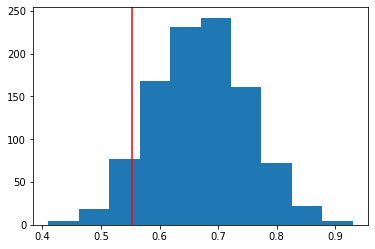

In [ ]:
import random
random.seed(1234) 
x,y = np.random.multivariate_normal(mu,sigma,n).T

avals_boot = []
for ii in range(N):
  ind = np.random.choice(n, n)
  x_boot = x[ind]
  y_boot = y[ind]
  a_boot = alpha_fun(np.cov(x_boot,y_boot))
  avals_boot.append(a_boot)

plt.hist(avals_boot)
plt.axvline(alpha_true, color='r')
plt.show()


Create the side-by-side boxplot, as in the video.

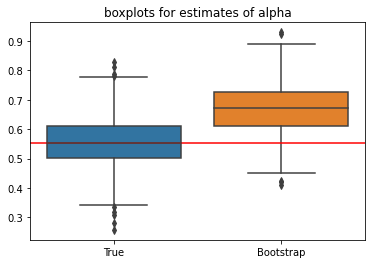

In [ ]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame(list(zip(avals,avals_boot)),columns=['True','Bootstrap'])
sns.boxplot(data=df)
plt.axhline(alpha_true, color='r')
plt.title('boxplots for estimates of alpha')
plt.show()

##4. A bad example of the bootstrap design

Notice that in the previous boostrap, you sampled the indexes once, and used the same index for a pair of $(X,Y)$. Let's suppose you generated bootstrap samples using following code:
 


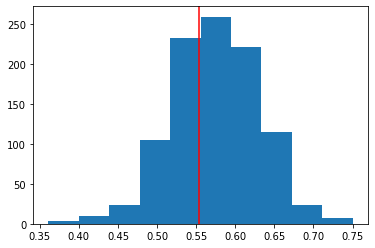

In [ ]:
random.seed(1234) 
x,y = np.random.multivariate_normal(mu,sigma,n).T

avals_boot2 = []
for ii in range(N):
  x_boot = x[np.random.choice(n, n)]
  y_boot = y[np.random.choice(n, n)]
  a_boot = alpha_fun(np.cov(x_boot,y_boot))
  avals_boot2.append(a_boot)

plt.hist(avals_boot2)
plt.axvline(alpha_true, color='r')
plt.show()


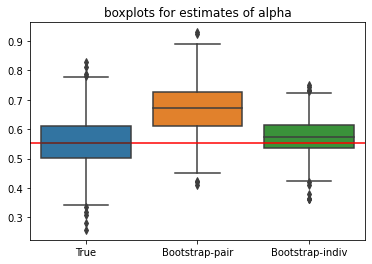

In [ ]:
df = pd.DataFrame(list(zip(avals,avals_boot,avals_boot2)),columns=['True','Bootstrap-pair','Bootstrap-indiv'])
sns.boxplot(data=df)
plt.axhline(alpha_true, color='r')
plt.title('boxplots for estimates of alpha')
plt.show()

What is the difference in this new bootstrap?


*   Notice that the only difference between the two bootstrap schemes are the following parts: In the first bootstrap code, 

```
ind = np.random.choice(n, n)
x_boot = x[ind]
y_boot = y[ind]
```

where as in the second bootstrap code,
``` 
x_boot = x[np.random.choice(n, n)]
y_boot = y[np.random.choice(n, n)]
```

Can you see the difference?

* The effect of this difference is quite substantial. The former samples a pair of $(X,Y)$ whereas the latter samples $X$ and $Y$ separately! With the former, the correlation structure is well-preserved in the bootstrap sample, whereas the latter one breaks that tie. Check the sample correlation of $X$ and $Y$ using the two bootstrap schemes.



Can you see that the latter bootstrap design is bad?

*   It has to be bad because the correlation of $(X,Y)$ in the bootstrap sample is very close to 0.
*   But when we compared the boxplots, this may not be apparent. 
*   If you want to see that the latter bootstrap scheme (individual sampling of $X$ and $Y$, rather than in pairs) is bad, change the ```sigma``` matrix as follows, for instance, and run the entire code again:

```
sigma = [[1,1],[1,1.12]] 
```



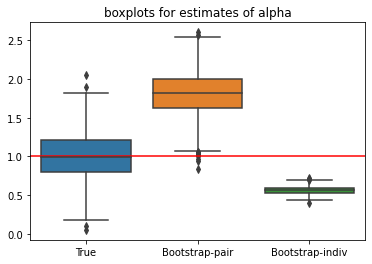

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

mu = [0,0]
sigma = [[1,1],[1,1.12]] 
n = 100
x,y = np.random.multivariate_normal(mu,sigma,n).T
alpha_true = alpha_fun(np.matrix(sigma))


# Simulated data
avals = []
for ii in range(N):
  x,y = np.random.multivariate_normal(mu,sigma,n).T
  a = alpha_fun(np.cov(x,y))
  avals.append(a)

# paired iid bootstrap
random.seed(1234) 
x,y = np.random.multivariate_normal(mu,sigma,n).T

avals_boot = []
for ii in range(N):
  ind = np.random.choice(n, n)
  x_boot = x[ind]
  y_boot = y[ind]
  a_boot = alpha_fun(np.cov(x_boot,y_boot))
  avals_boot.append(a_boot)

# individual iid bootstrap
avals_boot2 = []
for ii in range(N):
  x_boot = x[np.random.choice(n, n)]
  y_boot = y[np.random.choice(n, n)]
  a_boot = alpha_fun(np.cov(x_boot,y_boot))
  avals_boot2.append(a_boot)


# boxplot
df = pd.DataFrame(list(zip(avals,avals_boot,avals_boot2)),columns=['True','Bootstrap-pair','Bootstrap-indiv'])
sns.boxplot(data=df)
plt.axhline(alpha_true, color='r')
plt.title('boxplots for estimates of alpha')
plt.show()

In [ ]:
# [Hint for HW]
# For the last question of the homework, you are asked to generate a time dependent sequence of X and Y.
# This is one way of generating such X and Y.

import numpy as np
mu = [0,0]
sigma = [[1,0.5],[0.5,1.12]] 
n = 100
phi = 0.8

epsilon = np.random.multivariate_normal(mu,sigma,n).T

z = []
oldz = epsilon[:,0]
z.append(oldz)

for i in range(1,n):
  newz = phi*oldz+ epsilon[:,i]
  z.append(newz)
  oldz=newz

z = np.array(z)
x = z[:,0]
y = z[:,1]

print(np.cov(x,y))

[[1.40988389 1.32906407]
 [1.32906407 3.55732069]]
